In [51]:
import torch
import matplotlib.pyplot as plt
from metrics import cum_regret, cum_violation, HV, violation

simple HV regret

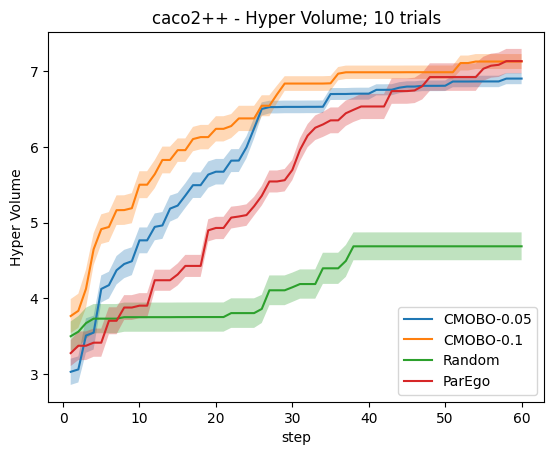

In [56]:

hv_005 = torch.zeros(10, 60)
hv_01 = torch.zeros(10, 60)
hv_rand = torch.zeros(10, 60)
hv_parego = torch.zeros(10, 60)
thresholds = torch.tensor([0.5, 80, -5], dtype= torch.float64)
for i in range(10):
    hv_005[i,:] = torch.load(f'caco_cmobo/hv_caco_0.05/hv_caco_0.05_{i+1}.pt')
    hv_01[i,:] = torch.load(f'caco_cmobo/hv_caco_0.1/hv_caco_0.1_{i+1}.pt')
    hv_rand[i,:] = torch.load(f'caco_cmobo/hv_random_caco/hv_random_caco_{i+1}.pt')
    hv_parego[i,:] = torch.load(f'caco_qparego/hv_qparego_caco/hv_qparego_caco_{i+1}.pt')[1:]
vio_005 = torch.zeros(10, 60)
vio_01 = torch.zeros(10, 60)
vio_rand = torch.zeros(10, 60)
vio_parego = torch.zeros(10, 60)
for i in range(10):
    vio_005[i,:] = violation(torch.load(f'caco_cmobo/obj_caco_0.05/obj_caco_0.05_{i+1}.pt')[-61:-1,:], thresholds)
    vio_01[i,:] = violation(torch.load(f'caco_cmobo/obj_caco_0.1/obj_caco_0.1_{i+1}.pt')[-61:-1,:], thresholds)
    vio_rand[i,:] = violation(torch.load(f'caco_cmobo/obj_caco_rand/obj_caco_rand_{i+1}.pt')[-61:-1,:], thresholds)
    vio_parego[i,:] = violation(torch.load(f'caco_qparego/obj_qparego_caco/obj_qparego_caco_{i+1}.pt')[-61:-1,:], thresholds)
hv = [hv_005, hv_01, hv_rand, hv_parego]
vio = [vio_005, vio_01, vio_rand, vio_parego]
mean = []
std = []
for data in hv:
    mean.append(data.mean(dim = 0))
    std.append(data.std(dim = 0))

for i in range(4):
    plt.plot(range(1,61), mean[i])
for i in range(4):
    plt.fill_between(range(1,61), mean[i] + 0.1 * std[i], mean[i] - 0.1 * std[i], alpha = 0.3)
plt.title('caco2++ - Hyper Volume; 10 trials')
plt.legend(['CMOBO-0.05', 'CMOBO-0.1', 'Random', 'ParEgo'])
plt.xlabel('step')
plt.ylabel('Hyper Volume')
plt.show()

Cumulative HV regret

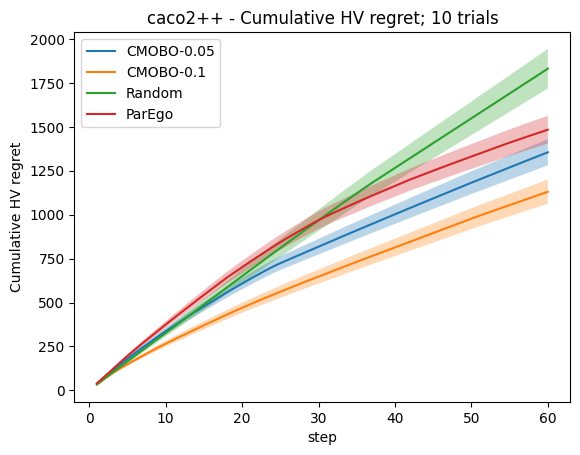

In [53]:
from metrics import cum_regret
mean_rg = []
std_rg = []
for data in hv:
    cum_rg = cum_regret(data, 10)
    mean_rg.append(cum_rg.mean(dim = 0))
    std_rg.append(cum_rg.std(dim = 0))
for i in range(4):
    plt.plot(range(1,61), mean_rg[i])
for i in range(4):
    plt.fill_between(range(1,61), mean_rg[i] + 0.1 * std_rg[i], mean_rg[i] - 0.1 * std_rg[i], alpha = 0.3)
plt.title('caco2++ - Cumulative HV regret; 10 trials')
plt.legend(['CMOBO-0.05', 'CMOBO-0.1', 'Random', 'ParEgo'])
plt.xlabel('step')
plt.ylabel('Cumulative HV regret')
plt.show()

Cumulative Violation

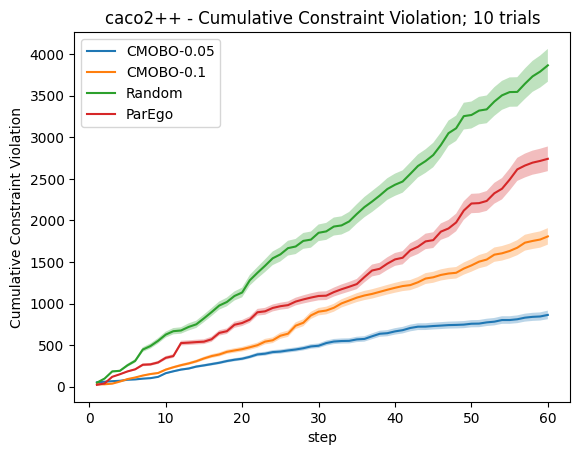

In [54]:
from metrics import cum_violation
mean_vio = []
std_vio = []
for data in vio:
    cum_vio = cum_violation(data)
    mean_vio.append(cum_vio.mean(dim = 0))
    std_vio.append(cum_vio.std(dim = 0))
for i in range(4):
    plt.plot(range(1,61), mean_vio[i])
for i in range(4):
    plt.fill_between(range(1,61), mean_vio[i] + 0.1 * std_vio[i], mean_vio[i] - 0.1 * std_vio[i], alpha = 0.3)
plt.title('caco2++ - Cumulative Constraint Violation; 10 trials')
plt.legend(['CMOBO-0.05', 'CMOBO-0.1', 'Random', 'ParEgo'])
plt.xlabel('step')
plt.ylabel('Cumulative Constraint Violation')
plt.show()

constraint regret

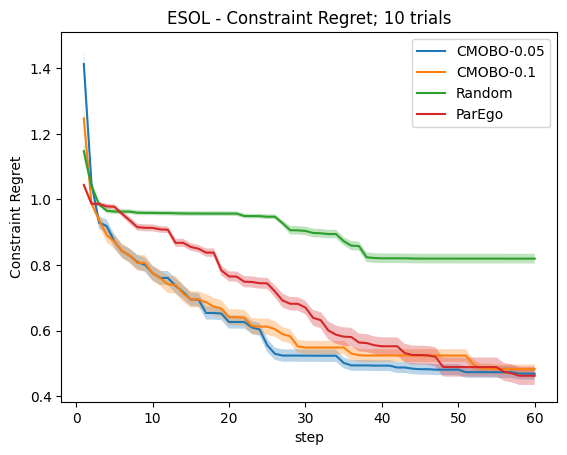

In [55]:
from metrics import constraint_regret
crg_005 = torch.zeros(10, 60)
crg_01 = torch.zeros(10, 60)
crg_rand = torch.zeros(10, 60)
crg_parego = torch.zeros(10, 60)
crg = [crg_005, crg_01, crg_rand, crg_parego]
for i in range(4):
    algo_hv = hv[i]
    algo_vio = vio[i]
    for ii in range(10):
        crg[i][ii,:] = constraint_regret(algo_vio[ii,:], algo_hv[ii, :], 10)

        
mean_crg = []
std_crg = []
for data in crg:
    mean_crg.append(data.mean(dim = 0))
    std_crg.append(data.std(dim = 0))
for i in range(4):
    plt.plot(range(1,61), mean_crg[i])
for i in range(4):
    plt.fill_between(range(1,61), mean_crg[i] + 0.1 * std_crg[i], mean_crg[i] - 0.1 * std_crg[i], alpha = 0.3)
plt.title('ESOL - Constraint Regret; 10 trials')
plt.legend(['CMOBO-0.05', 'CMOBO-0.1', 'Random', 'ParEgo'])
plt.xlabel('step')
plt.ylabel('Constraint Regret')
plt.show()